En el competitivo mercado actual, entender a tus clientes es crucial para el éxito de cualquier negocio. La **segmentación de clientes**, que consiste en **dividir** un mercado en grupos distintos de clientes que comparten **características similares**, es una herramienta poderosa que permite a las empresas **identificar y satisfacer las necesidades únicas** de diferentes grupos de clientes. Al aprovechar la segmentación de clientes, las empresas pueden superar a la competencia desarrollando productos y servicios que atraigan de manera única a cada segmento.

Nuestro proyecto se centra en la segmentación de clientes utilizando un conjunto de datos que contiene información básica sobre los clientes, incluyendo su ID, sexo, estado civil, edad, educación, ingresos, ocupación y tamaño del asentamiento.

El objetivo es analizar estos datos para identificar segmentos de clientes distintos dentro de nuestro supermercado. Al entender estos segmentos, podemos proporcionar información práctica a nuestro equipo de marketing para desarrollar estrategias dirigidas que resuenen con cada grupo.

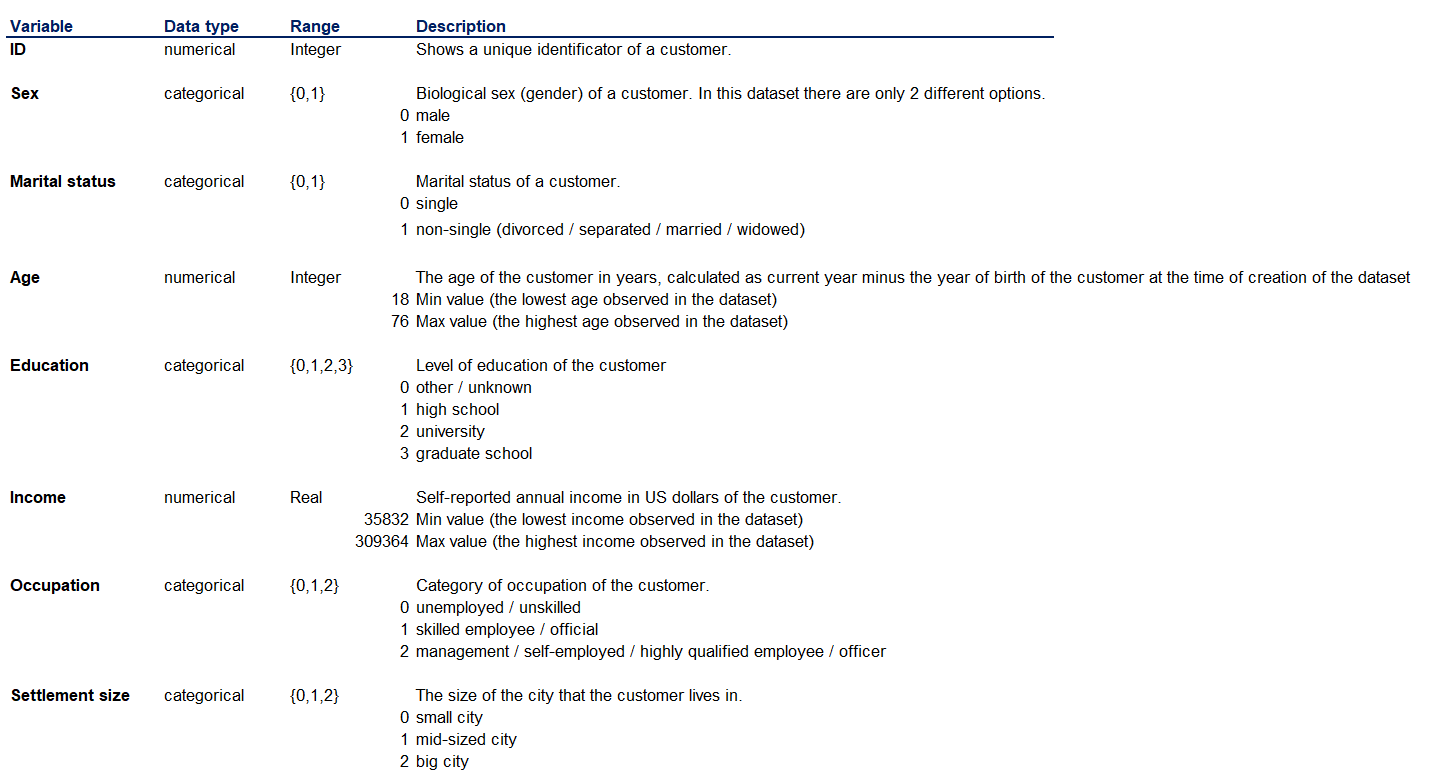

**¿Por qué la Segmentación de Clientes?**


La segmentación de clientes permite a las empresas:

**Identificar Clientes Objetivo**: Entender quiénes son los clientes más valiosos, qué necesitan y cómo atenderlos mejor.

**Mejorar la Satisfacción del Cliente**: Adaptar productos y servicios para satisfacer las necesidades específicas de diferentes segmentos, aumentando así la satisfacción y lealtad del cliente.

**Optimizar Estrategias de Marketing**: Desarrollar campañas de marketing más efectivas dirigidas a grupos específicos de clientes con mensajes personalizados.

**Incrementar los ingresos**: Enfocarse en clientes y oportunidades de alto valor, lo que lleva a mayores tasas de conversión y aumento de ventas.

# Preparación

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ruta_carpeta = "drive/MyDrive/TP Final ML/segmentation data.csv"
df = pd.read_csv(ruta_carpeta)

In [ ]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [ ]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


Hay 2000 registros, no hay valores faltantes

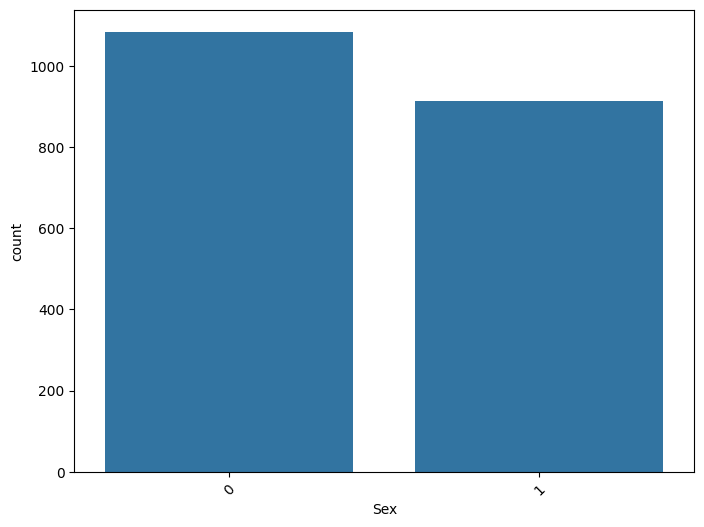

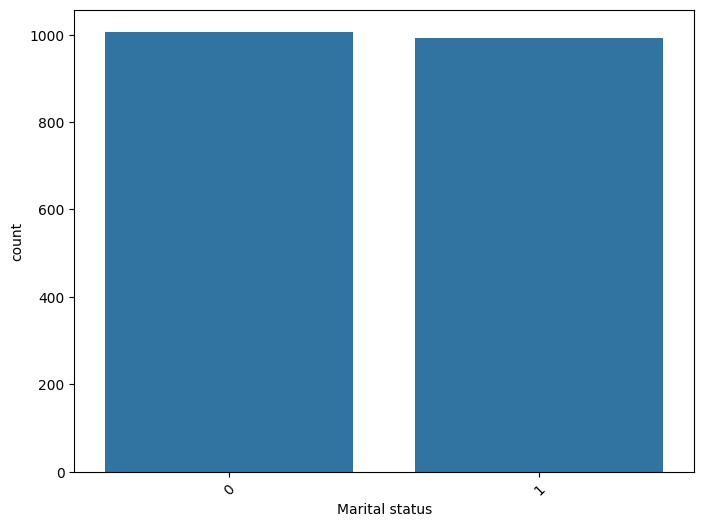

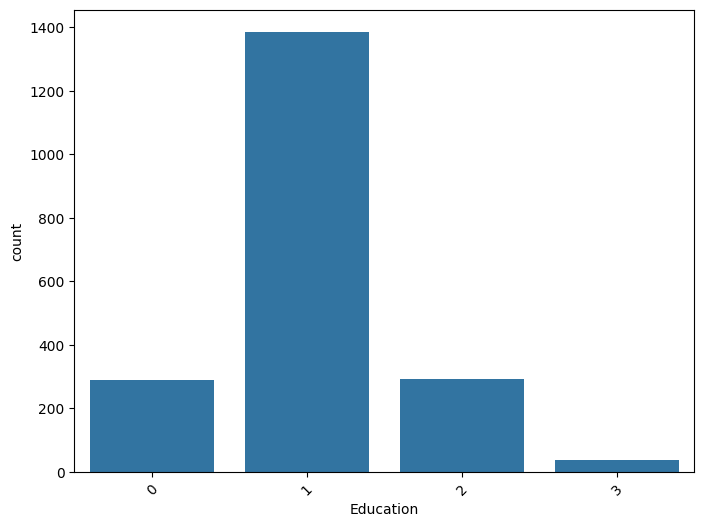

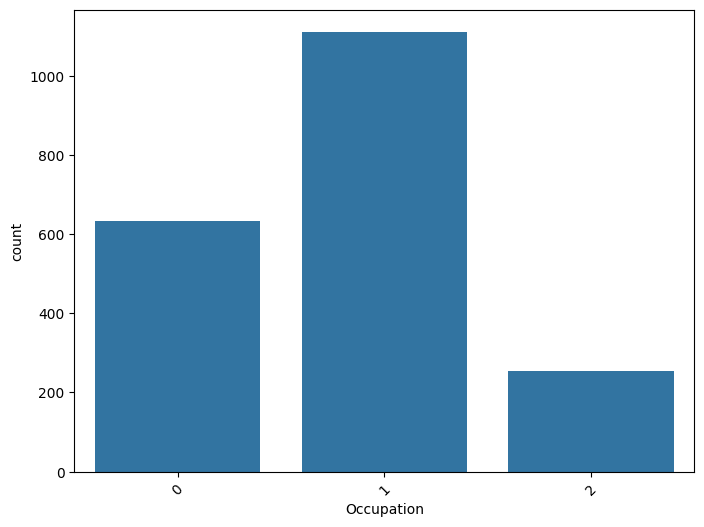

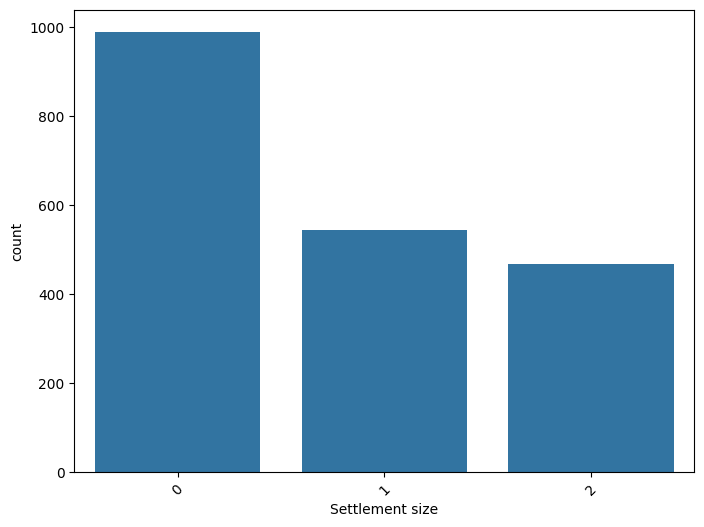

In [ ]:
for column in ["Sex", "Marital status", "Education", "Occupation", "Settlement size"]:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column)
    plt.xlabel(column, fontsize=10)
    plt.xticks(rotation=45)
    plt.show()

# Modelos

In [ ]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


Pasos a seguir de cada columna:


*   Sex: es 0,1 no hay nada que cambiar.
*   Marital status: como es columna binaria la dejamos así.
*   Age: variable continua, nada que cambiar.
*   Education: Hay 4 valores posibles, los vamos a renombrar y convertir en columnas binarias
*   Income: variable continua, no cambiamos nada
*   Occupation: lo mismo que con education
*   Settlement size: también vamos a transformar en columnas binarias.



In [ ]:
df["Education"] = df['Education'].replace({0: "Other/unknown", 1: "High school", 2:"University", 3:"Graduate school" })
df["Occupation"] = df['Occupation'].replace({0: "Unemployed", 1: "Skilled employee", 2:"High qualified employee" })
df["Settlement size"] = df['Settlement size'].replace({0: "Small", 1: "Mid", 2:"Big"})

In [ ]:
df = pd.get_dummies(df, columns=['Education', 'Occupation', "Settlement size"])

In [ ]:
df.head()

,ID,Sex,Marital status,Age,Income,Education_Graduate school,Education_High school,Education_Other/unknown,Education_University,Occupation_High qualified employee,Occupation_Skilled employee,Occupation_Unemployed,Settlement size_Big,Settlement size_Mid,Settlement size_Small
0,100000001,0,0,67,124670,False,False,False,True,False,True,False,True,False,False
1,100000002,1,1,22,150773,False,True,False,False,False,True,False,True,False,False
2,100000003,0,0,49,89210,False,True,False,False,False,False,True,False,False,True
3,100000004,0,0,45,171565,False,True,False,False,False,True,False,False,True,False
4,100000005,0,0,53,149031,False,True,False,False,False,True,False,False,True,False


Quitamos la columna ID

In [ ]:
df.drop("ID", inplace=True, axis=1)

In [ ]:
df.head()

,Sex,Marital status,Age,Income,Education_Graduate school,Education_High school,Education_Other/unknown,Education_University,Occupation_High qualified employee,Occupation_Skilled employee,Occupation_Unemployed,Settlement size_Big,Settlement size_Mid,Settlement size_Small
0,0,0,67,124670,False,False,False,True,False,True,False,True,False,False
1,1,1,22,150773,False,True,False,False,False,True,False,True,False,False
2,0,0,49,89210,False,True,False,False,False,False,True,False,False,True
3,0,0,45,171565,False,True,False,False,False,True,False,False,True,False
4,0,0,53,149031,False,True,False,False,False,True,False,False,True,False


In [ ]:
# from sklearn.decomposition import PCA

In [ ]:

# Aplicar PCA
# pca = PCA(n_components=3)
# df_pca = pca.fit_transform(df)

# Convertir el resultado a un DataFrame para facilitar el uso posterior
# df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3'])

# Imprimir la varianza explicada por cada componente principal
# explained_variance = pca.explained_variance_ratio_
# for i, variance in enumerate(explained_variance):
    # print(f"Componente Principal {i+1}: {variance:.2%} de la varianza explicada")


No voy a usar PCA para no quitar interpretabilidad.

In [ ]:
from sklearn.preprocessing import StandardScaler
# Aplicar StandardScaler a las columnas numéricas
df = df.astype(int)

# Aplicar StandardScaler a todas las columnas
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


## Kmeans

In [ ]:
import random
random.seed(42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

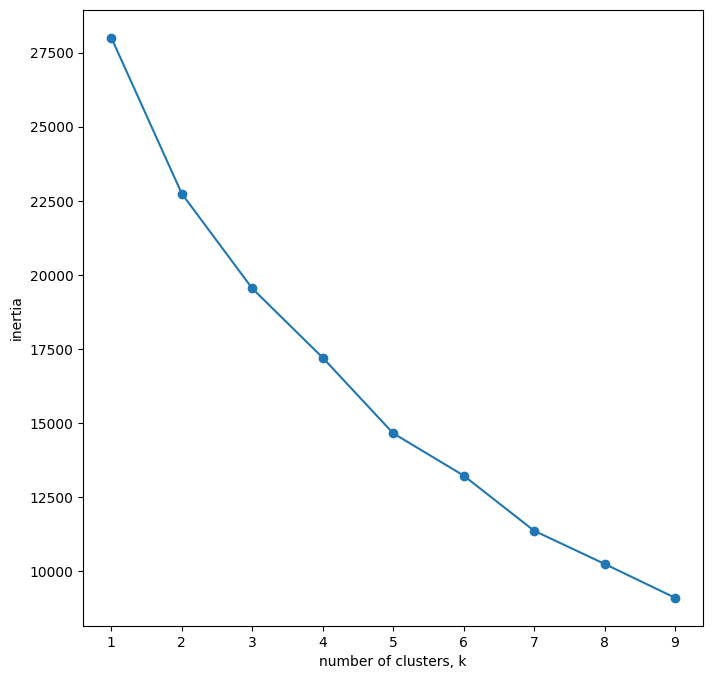

In [ ]:

fig = plt.figure(figsize=(8, 8))
ks = range(1, 10)
inertias = []
for k in ks:
# Genera un modelo para KMeans con k clústeres
    model = KMeans(k)
# Ajusta el modelo a las muestras
    model.fit(df)
# Agrega las inercias calculadas
    inertias.append(model.inertia_)
# Gráfico de inercias vs. número de clusters
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Para elegir el valor óptimo de K usamos el método del codo. Es un método gráfico para encontrar el valor K óptimo en un algoritmo de agrupamiento de k-means. El gráfico del codo muestra los valores de suma de cuadrados dentro del grupo (WCSS) en el eje y correspondientes a los diferentes valores de K (en el eje x). El valor óptimo de K es el punto en el que el gráfico forma un codo.

No parece tan claro el codo como para poder determinar la cantidad óptima de clústers. Vamos a probar con 3, 4 y 5.

In [ ]:
# Create a KMeans instance with k clusters: model
model = KMeans(3)

# Fit model to samples
#model.fit(iris)
labels = model.fit_predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df['cluster_kmeans']= labels

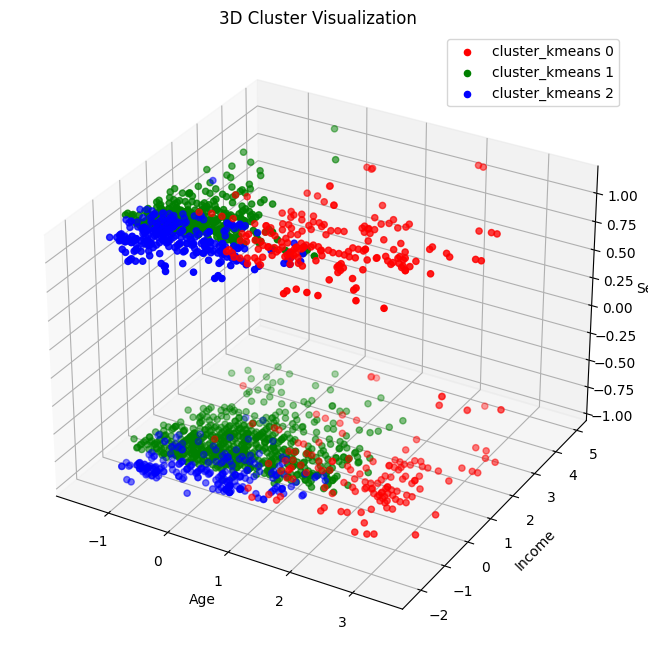

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Definir colores para los clusters
colors = ['r', 'g', 'b' ]

# Graficar cada cluster con un color distinto
for cluster in df['cluster_kmeans'].unique():
    cluster_data = df[df['cluster_kmeans'] == cluster]
    ax.scatter(df['Age'][df['cluster_kmeans'] == cluster],
               df['Income'][df['cluster_kmeans'] == cluster],
               cluster_data['Sex'],
               label=f'cluster_kmeans {cluster}',
               color=colors[cluster])

ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Sex')
ax.set_title('3D Cluster Visualization')
ax.legend()

plt.show()

Viendo solo estos ejes podemos ver:

clúster 0: mayormente formada por hombres jóvenes de ingresos medio-altos.

clúster 1: gente mayor de ambos géneros y de ninguna clase económica en particular.

clúster 2: mayormente mujeres jóvenes de ingresos medio-bajos.


In [ ]:
# Create a KMeans instance with k clusters: model
model = KMeans(4)

# Fit model to samples
#model.fit(iris)
labels = model.fit_predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df['cluster_kmeans']= labels

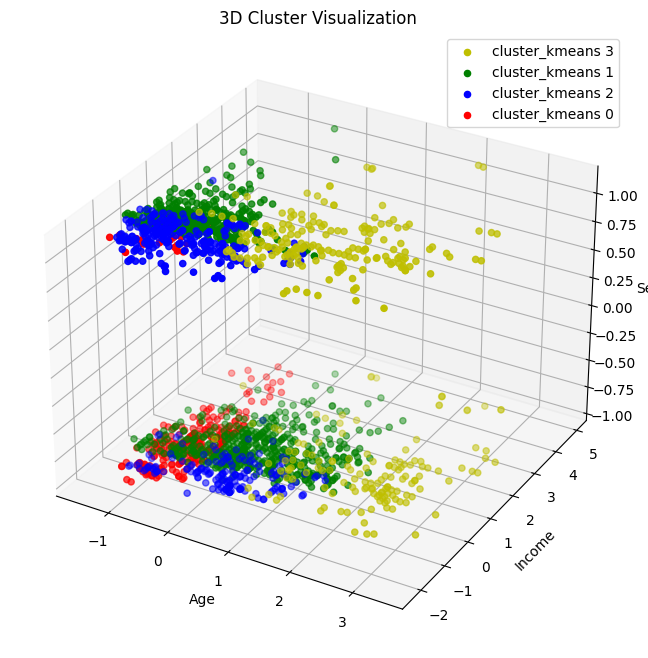

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Definir colores para los clusters
colors = ['r', 'g', 'b', "y" ]

# Graficar cada cluster con un color distinto
for cluster in df['cluster_kmeans'].unique():
    cluster_data = df[df['cluster_kmeans'] == cluster]
    ax.scatter(df['Age'][df['cluster_kmeans'] == cluster],
               df['Income'][df['cluster_kmeans'] == cluster],
               cluster_data['Sex'],
               label=f'cluster_kmeans {cluster}',
               color=colors[cluster])

ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Sex')
ax.set_title('3D Cluster Visualization')
ax.legend()

plt.show()

Parece que clasifica mejor a los hombres que conformaban el clúster 0 en clústers 0 y 3.

Luego probé con más clústers pero se complejiza mucho y comienza a subdividir clústers que están muy dispersos y son muy pequeños, es posible que el algoritmo no encuentre beneficios significativos al subdividir más. 

In [ ]:
df.columns

Index(['Sex', 'Marital status', 'Age', 'Income', 'Education_Graduate school',
       'Education_High school', 'Education_Other/unknown',
       'Education_University', 'Occupation_High qualified employee',
       'Occupation_Skilled employee', 'Occupation_Unemployed',
       'Settlement size_Big', 'Settlement size_Mid', 'Settlement size_Small',
       'cluster_kmeans'],
      dtype='object')

In [ ]:
ruta_carpeta = "drive/MyDrive/TP Final ML/my_dataframe.csv"
df = pd.read_csv(ruta_carpeta)

In [ ]:
df[['Occupation_High qualified employee',
       'Occupation_Skilled employee', 'Occupation_Unemployed',
       'Settlement size_Big', 'Settlement size_Mid', 'Settlement size_Small', "cluster_kmeans"]].groupby("cluster_kmeans").mean()

,Occupation_High qualified employee,Occupation_Skilled employee,Occupation_Unemployed,Settlement size_Big,Settlement size_Mid,Settlement size_Small
cluster_kmeans,,,,,,
0,0.271467,0.364598,-0.583781,0.479324,0.648823,-0.983062
1,0.291094,-0.206346,0.012010,0.115135,0.098768,-0.185330
2,-0.343872,-0.267491,0.531893,-0.551934,-0.611250,1.011061
3,-0.098877,0.058104,0.008724,0.139893,-0.086632,-0.041267


In [ ]:
df[['Sex', 'Marital status',  'Education_Graduate school',
       'Education_High school', 'Education_Other/unknown',
       'Education_University', "cluster_kmeans"]].groupby("cluster_kmeans").mean()

,Sex,Marital status,Education_Graduate school,Education_High school,Education_Other/unknown,Education_University
cluster_kmeans,,,,,,
0,-0.225179,-0.003495,-0.124111,0.662333,-0.409319,-0.412644
1,0.215633,0.399648,0.672141,-1.502441,-0.409319,2.118914
2,0.387435,0.218116,-0.135388,0.665584,-0.409319,-0.412644
3,-0.693573,-0.993024,-0.135388,-1.502441,2.443080,-0.412644


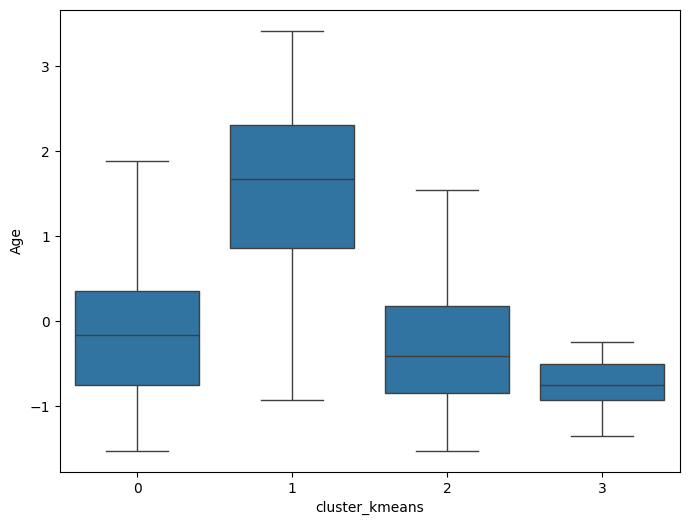

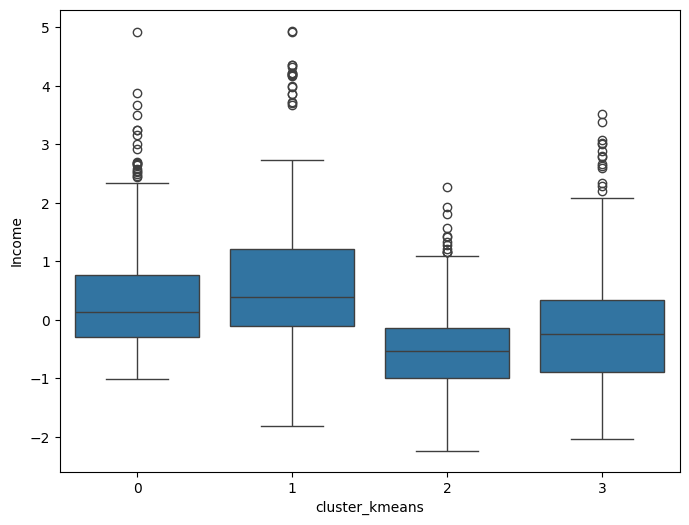

In [ ]:
for col in ["Age", "Income"]:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='cluster_kmeans', y=col)

In [ ]:
df

,Sex,Marital status,Age,Income,Education_Graduate school,Education_High school,Education_Other/unknown,Education_University,Occupation_High qualified employee,Occupation_Skilled employee,Occupation_Unemployed,Settlement size_Big,Settlement size_Mid,Settlement size_Small,cluster_kmeans
0,-0.917399,-0.993024,2.653614,0.097524,-0.135388,-1.502441,-0.409319,2.423397,-0.381412,0.892718,-0.680483,1.811810,-0.611250,-0.989060,1
1,1.090038,1.007025,-1.187132,0.782654,-0.135388,0.665584,-0.409319,-0.412644,-0.381412,0.892718,-0.680483,1.811810,-0.611250,-0.989060,0
2,-0.917399,-0.993024,1.117316,-0.833202,-0.135388,0.665584,-0.409319,-0.412644,-0.381412,-1.120175,1.469543,-0.551934,-0.611250,1.011061,2
3,-0.917399,-0.993024,0.775916,1.328386,-0.135388,0.665584,-0.409319,-0.412644,-0.381412,0.892718,-0.680483,-0.551934,1.635992,-0.989060,0
4,-0.917399,-0.993024,1.458716,0.736932,-0.135388,0.665584,-0.409319,-0.412644,-0.381412,0.892718,-0.680483,-0.551934,1.635992,-0.989060,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.090038,-0.993024,0.946616,0.067471,-0.135388,0.665584,-0.409319,-0.412644,-0.381412,-1.120175,1.469543,-0.551934,-0.611250,1.011061,2
1996,1.090038,1.007025,-0.760382,-0.084265,-0.135388,0.665584,-0.409319,-0.412644,-0.381412,0.892718,-0.680483,-0.551934,-0.611250,1.011061,2
1997,-0.917399,-0.993024,-0.418983,-0.906957,-0.135388,-1.502441,2.443080,-0.412644,-0.381412,-1.120175,1.469543,-0.551934,-0.611250,1.011061,3
1998,1.090038,1.007025,-1.016432,-0.603329,-0.135388,0.665584,-0.409319,-0.412644,-0.381412,-1.120175,1.469543,-0.551934,-0.611250,1.011061,2


clúster 0 (rojo)
Ambos géneros pero mayormente hombres de nivel económico medio, secundaria completa y empleados de grandes y medianas ciudades.

clúster 1 (verde)
Ambos géneros de edad avanzada, casados, nivel económico medio-alto. Atendieron a la universidad. Predominan las mujeres

clúster 2 (azul)
Adultos jóvenes mayormente mujeres, secundaria completa pero desempleadas. De ciudades pequeñas.

clúster 3 (amarillo)
Hombres jóvenes/adolescentes solteros de todos los niveles económicos.


Para buscar las características principales miré no solo los promedios sino también los promedios de todo el dataset.

In [ ]:
df.columns

Index(['Sex', 'Marital status', 'Age', 'Income', 'Education_Graduate school',
       'Education_High school', 'Education_Other/unknown',
       'Education_University', 'Occupation_High qualified employee',
       'Occupation_Skilled employee', 'Occupation_Unemployed',
       'Settlement size_Big', 'Settlement size_Mid', 'Settlement size_Small',
       'cluster_kmeans'],
      dtype='object')

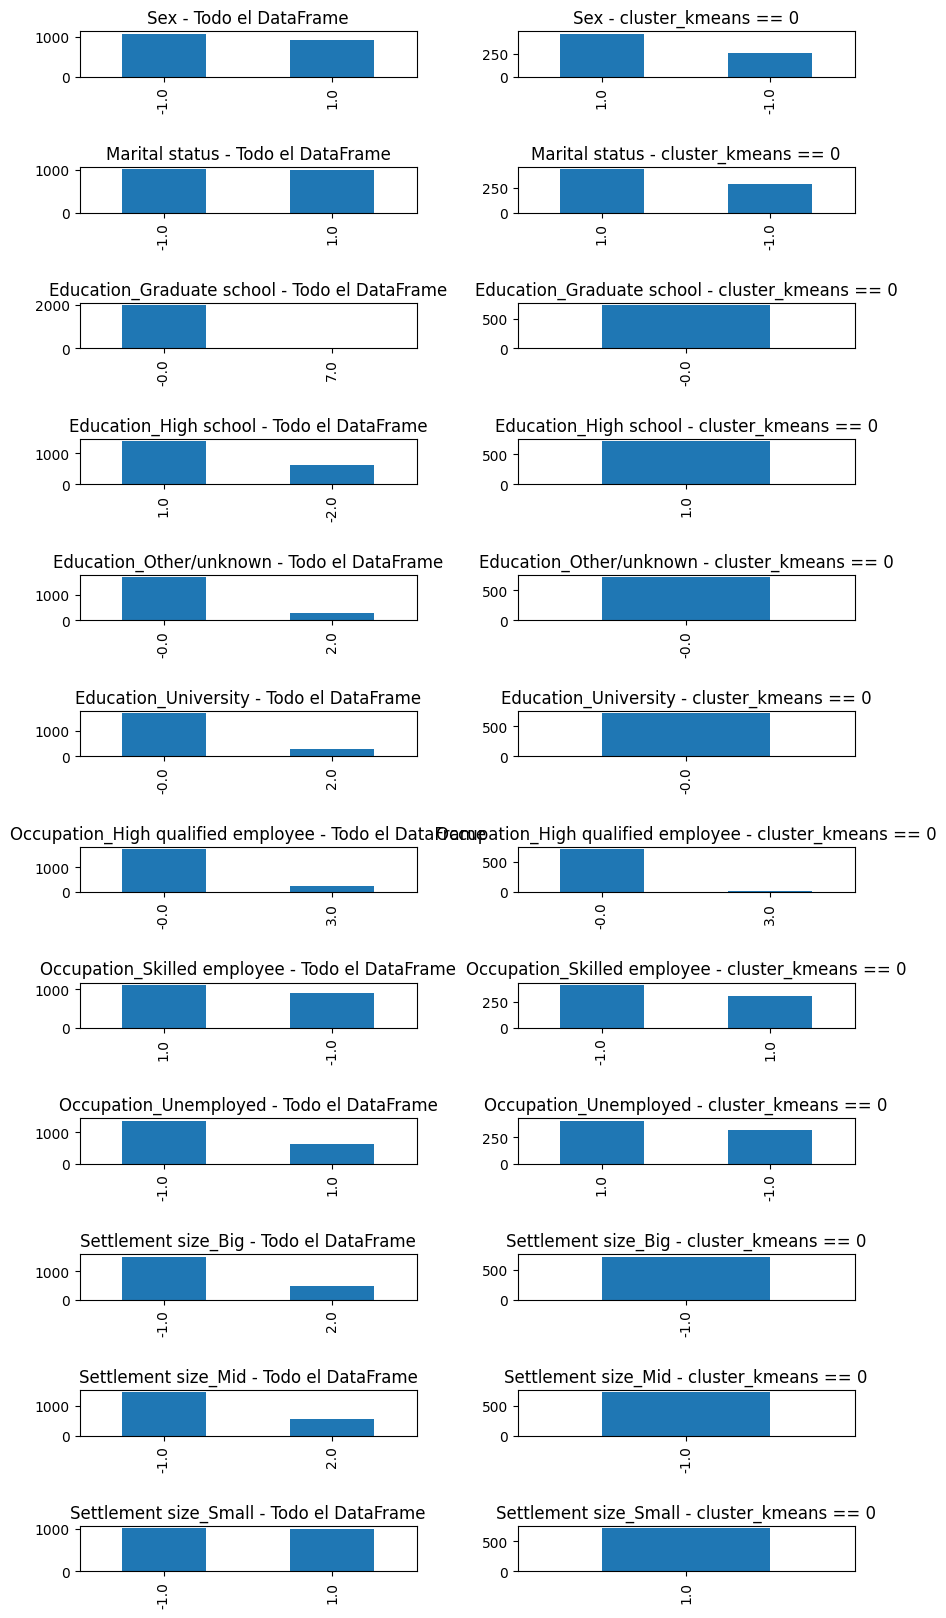

In [ ]:
fig, axs = plt.subplots(len(['Sex', 'Marital status',  'Education_Graduate school','Education_High school', 'Education_Other/unknown',   'Education_University', 'Occupation_High qualified employee',
       'Occupation_Skilled employee', 'Occupation_Unemployed',
       'Settlement size_Big', 'Settlement size_Mid', 'Settlement size_Small']), 2, figsize=(10, 20))
plt.subplots_adjust(hspace=2, wspace=0.3)
# Iterar sobre las columnas del DataFrame
for i, col in enumerate(['Sex', 'Marital status',  'Education_Graduate school',
       'Education_High school', 'Education_Other/unknown',
       'Education_University', 'Occupation_High qualified employee',
       'Occupation_Skilled employee', 'Occupation_Unemployed',
       'Settlement size_Big', 'Settlement size_Mid', 'Settlement size_Small']):
    # Gráfico para todo el DataFrame
    axs[i, 0].set_title(f'{col} - Todo el DataFrame')
    df.round()[col].value_counts().plot(kind='bar', ax=axs[i, 0])
    axs[i, 0].set_xlabel('')

    # Gráfico filtrado por cluster_kmeans == 0
    axs[i, 1].set_title(f'{col} - cluster_kmeans == 0')
    df.round()[df.round()["cluster_kmeans"] == 2][col].value_counts().plot(kind='bar', ax=axs[i, 1])
    axs[i, 1].set_xlabel('')

# Ajustar el diseño de los subplots
#plt.tight_layout()
plt.show()

## Clustering jerárquico

El principal problema de K-means es que tenemos que escoger el número óptimo de clústers K, y en casos reales este no es un problema fácil de resolver. Una alternativa a K-means, es el clústering jerárquico (Hierarchical clústering). En el clúster jerárquico, no hace falta escoger el número de clústers.

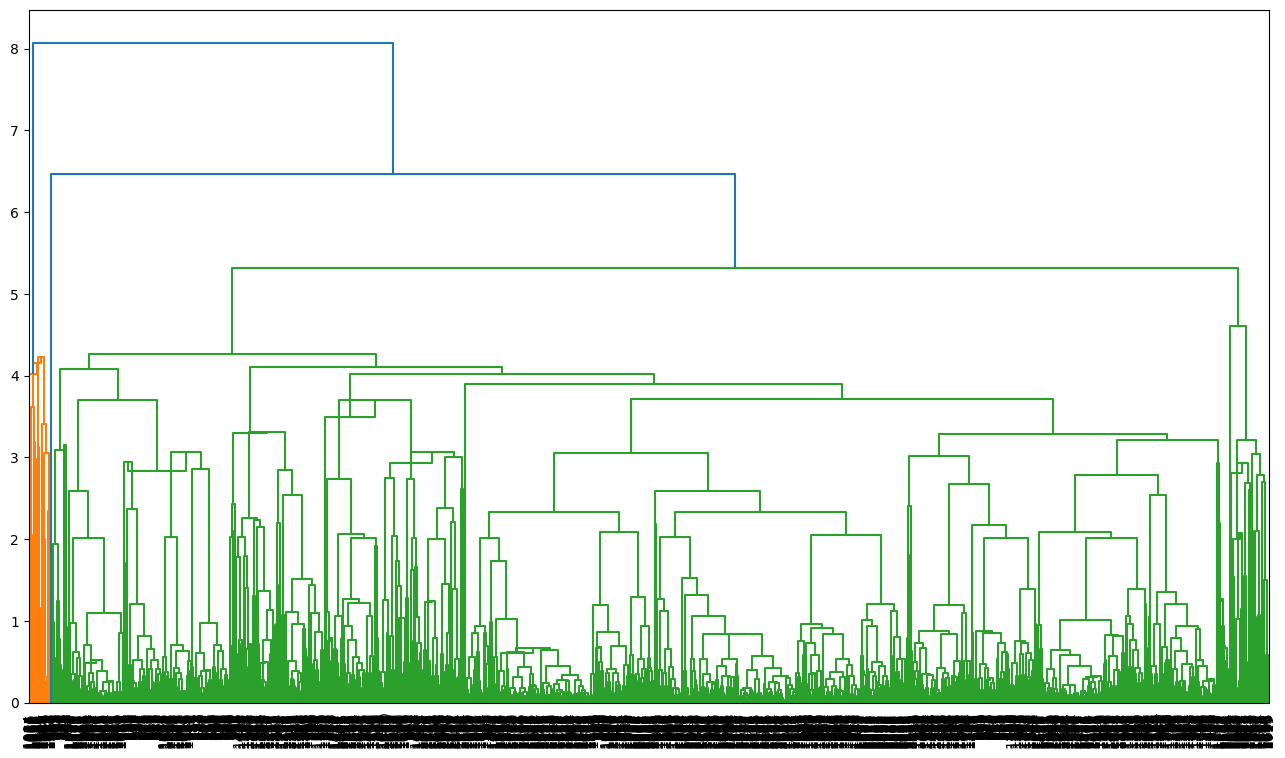

In [ ]:
from scipy.cluster.hierarchy import linkage , dendrogram
from scipy.cluster.hierarchy import fcluster

# Get current size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

mergings = linkage(df,method='centroid')
dendrogram(mergings,leaf_rotation=90,leaf_font_size=10)
plt.show()

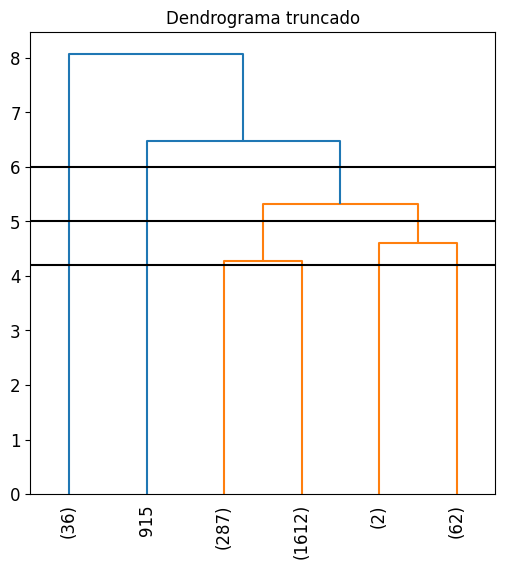

In [ ]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]

 # Set figure width to 12 and height to 9
fig_size[0] = 6
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

# Calculate the linkage: mergings
mergings = linkage(df,method='centroid')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,leaf_rotation=90,
            truncate_mode='lastp',
            p=6,
            leaf_font_size=12,
)
plt.axhline(y=5, c='k')
plt.axhline(y=6, c='k')
plt.axhline(y=4.2, c='k')

plt.title('Dendrograma truncado')
plt.yticks(size=12)
plt.show()

Vemos 3 posibles cortes: 4.2, 5 y 6.2 (5, 4 y 3 clústers).

In [ ]:
max_d = 5
clusters = fcluster(mergings, max_d, criterion='distance')

In [ ]:
df['cluster_jerarquico']= clusters
df.head()

,Sex,Marital status,Age,Income,Education_Graduate school,Education_High school,Education_Other/unknown,Education_University,Occupation_High qualified employee,Occupation_Skilled employee,Occupation_Unemployed,Settlement size_Big,Settlement size_Mid,Settlement size_Small,cluster_kmeans,cluster_jerarquico
0,-0.917399,-0.993024,2.653614,0.097524,-0.135388,-1.502441,-0.409319,2.423397,-0.381412,0.892718,-0.680483,1.811810,-0.611250,-0.989060,1,2
1,1.090038,1.007025,-1.187132,0.782654,-0.135388,0.665584,-0.409319,-0.412644,-0.381412,0.892718,-0.680483,1.811810,-0.611250,-0.989060,0,2
2,-0.917399,-0.993024,1.117316,-0.833202,-0.135388,0.665584,-0.409319,-0.412644,-0.381412,-1.120175,1.469543,-0.551934,-0.611250,1.011061,2,2
3,-0.917399,-0.993024,0.775916,1.328386,-0.135388,0.665584,-0.409319,-0.412644,-0.381412,0.892718,-0.680483,-0.551934,1.635992,-0.989060,0,2
4,-0.917399,-0.993024,1.458716,0.736932,-0.135388,0.665584,-0.409319,-0.412644,-0.381412,0.892718,-0.680483,-0.551934,1.635992,-0.989060,0,2


In [ ]:
df.cluster_jerarquico.value_counts()

cluster_jerarquico
2    1899
3      64
1      36
4       1
Name: count, dtype: int64

Vamos a ver qué tan distinto es de Kmeans:

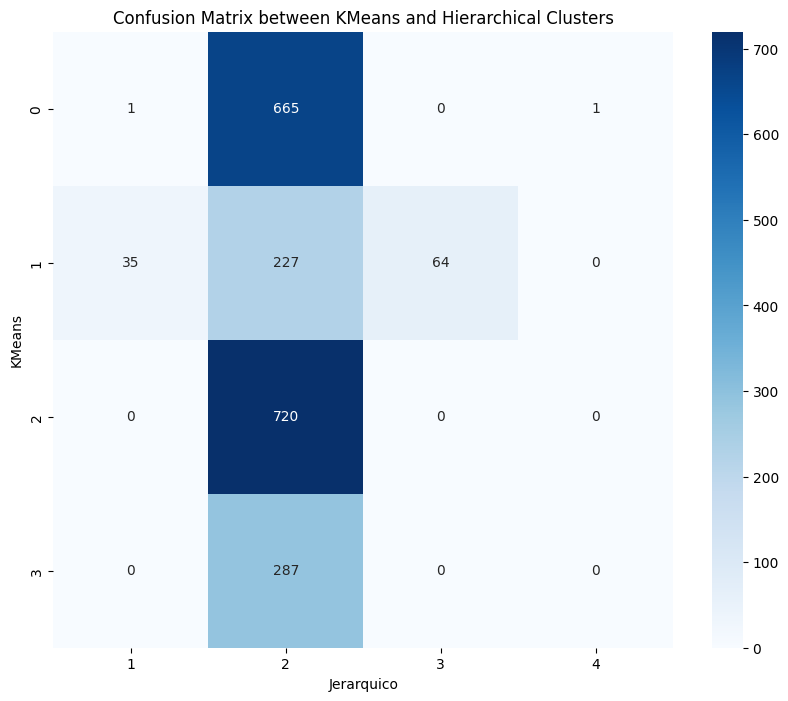

In [ ]:
# Crear la matriz de confusión utilizando pandas.crosstab
confusion_matrix = pd.crosstab(df['cluster_kmeans'], df['cluster_jerarquico'], rownames=['KMeans'], colnames=['Jerarquico'])

# Graficar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix between KMeans and Hierarchical Clusters')
plt.show()

El problema que estamos viendo acá es que hay un grupo que engloba casi 1900 de los 2000 registros que tenemos. Para poder hacer un buen análisis, vamos a marcarlos como outliers y continuar el análisis con el grupo mayoritario.


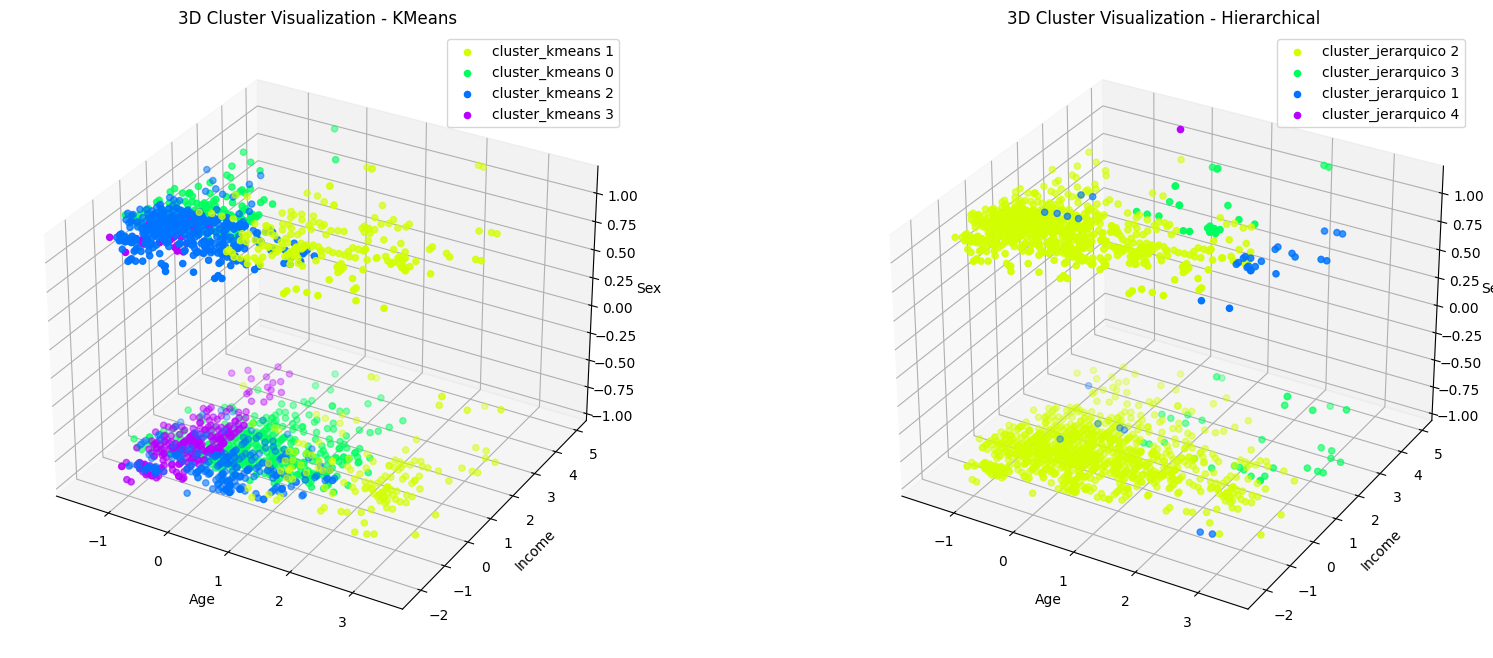

In [ ]:

# Crear una figura y dos subplots 3D
fig = plt.figure(figsize=(20, 8))

# Definir una paleta de colores utilizando seaborn para la cantidad de clusters
num_clusters_kmeans = len(df['cluster_kmeans'].unique())
num_clusters_jerarquico = len(df['cluster_jerarquico'].unique())

colors_kmeans = sns.color_palette("hsv", num_clusters_kmeans)
colors_jerarquico = sns.color_palette("hsv", num_clusters_jerarquico)

# Crear un diccionario para asignar colores a los clusters de kmeans
cluster_colors_kmeans = {cluster: color for cluster, color in zip(df['cluster_kmeans'].unique(), colors_kmeans)}

# Crear un diccionario para asignar colores a los clusters jerárquicos
cluster_colors_jerarquico = {cluster: color for cluster, color in zip(df['cluster_jerarquico'].unique(), colors_jerarquico)}

# Primer gráfico para cluster_kmeans
ax1 = fig.add_subplot(121, projection='3d')

# Graficar cada cluster_kmeans con un color distinto
for cluster in df['cluster_kmeans'].unique():
    cluster_data = df[df['cluster_kmeans'] == cluster]
    ax1.scatter(cluster_data['Age'], cluster_data['Income'], cluster_data['Sex'],
                label=f'cluster_kmeans {cluster}', color=cluster_colors_kmeans[cluster])

ax1.set_xlabel('Age')
ax1.set_ylabel('Income')
ax1.set_zlabel('Sex')
ax1.set_title('3D Cluster Visualization - KMeans')
ax1.legend()

# Segundo gráfico para cluster_jerarquico
ax2 = fig.add_subplot(122, projection='3d')

# Graficar cada cluster_jerarquico con un color distinto
for cluster in df['cluster_jerarquico'].unique():
    cluster_data = df[df['cluster_jerarquico'] == cluster]
    ax2.scatter(cluster_data['Age'], cluster_data['Income'], cluster_data['Sex'],
                label=f'cluster_jerarquico {cluster}', color=cluster_colors_jerarquico[cluster])

ax2.set_xlabel('Age')
ax2.set_ylabel('Income')
ax2.set_zlabel('Sex')
ax2.set_title('3D Cluster Visualization - Hierarchical')
ax2.legend()

plt.show()


Vemos acá que el 2 es el clúster que agrupa casi todos los clientes y nos vamos a centrar en este.

Vamos a repetir el proceso para poder indagar en clústerizar este gran grupo y asumir el resto como outliers por el momento.


In [ ]:
df_continuacion = df[df["cluster_jerarquico"]== 2]

In [ ]:
df_continuacion

,Sex,Marital status,Age,Income,Education_Graduate school,Education_High school,Education_Other/unknown,Education_University,Occupation_High qualified employee,Occupation_Skilled employee,Occupation_Unemployed,Settlement size_Big,Settlement size_Mid,Settlement size_Small,cluster_kmeans,cluster_jerarquico
0,-0.917399,-0.993024,2.653614,0.097524,-0.135388,-1.502441,-0.409319,2.423397,-0.381412,0.892718,-0.680483,1.811810,-0.611250,-0.989060,1,2
1,1.090038,1.007025,-1.187132,0.782654,-0.135388,0.665584,-0.409319,-0.412644,-0.381412,0.892718,-0.680483,1.811810,-0.611250,-0.989060,0,2
2,-0.917399,-0.993024,1.117316,-0.833202,-0.135388,0.665584,-0.409319,-0.412644,-0.381412,-1.120175,1.469543,-0.551934,-0.611250,1.011061,2,2
3,-0.917399,-0.993024,0.775916,1.328386,-0.135388,0.665584,-0.409319,-0.412644,-0.381412,0.892718,-0.680483,-0.551934,1.635992,-0.989060,0,2
4,-0.917399,-0.993024,1.458716,0.736932,-0.135388,0.665584,-0.409319,-0.412644,-0.381412,0.892718,-0.680483,-0.551934,1.635992,-0.989060,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.090038,-0.993024,0.946616,0.067471,-0.135388,0.665584,-0.409319,-0.412644,-0.381412,-1.120175,1.469543,-0.551934,-0.611250,1.011061,2,2
1996,1.090038,1.007025,-0.760382,-0.084265,-0.135388,0.665584,-0.409319,-0.412644,-0.381412,0.892718,-0.680483,-0.551934,-0.611250,1.011061,2,2
1997,-0.917399,-0.993024,-0.418983,-0.906957,-0.135388,-1.502441,2.443080,-0.412644,-0.381412,-1.120175,1.469543,-0.551934,-0.611250,1.011061,3,2
1998,1.090038,1.007025,-1.016432,-0.603329,-0.135388,0.665584,-0.409319,-0.412644,-0.381412,-1.120175,1.469543,-0.551934,-0.611250,1.011061,2,2


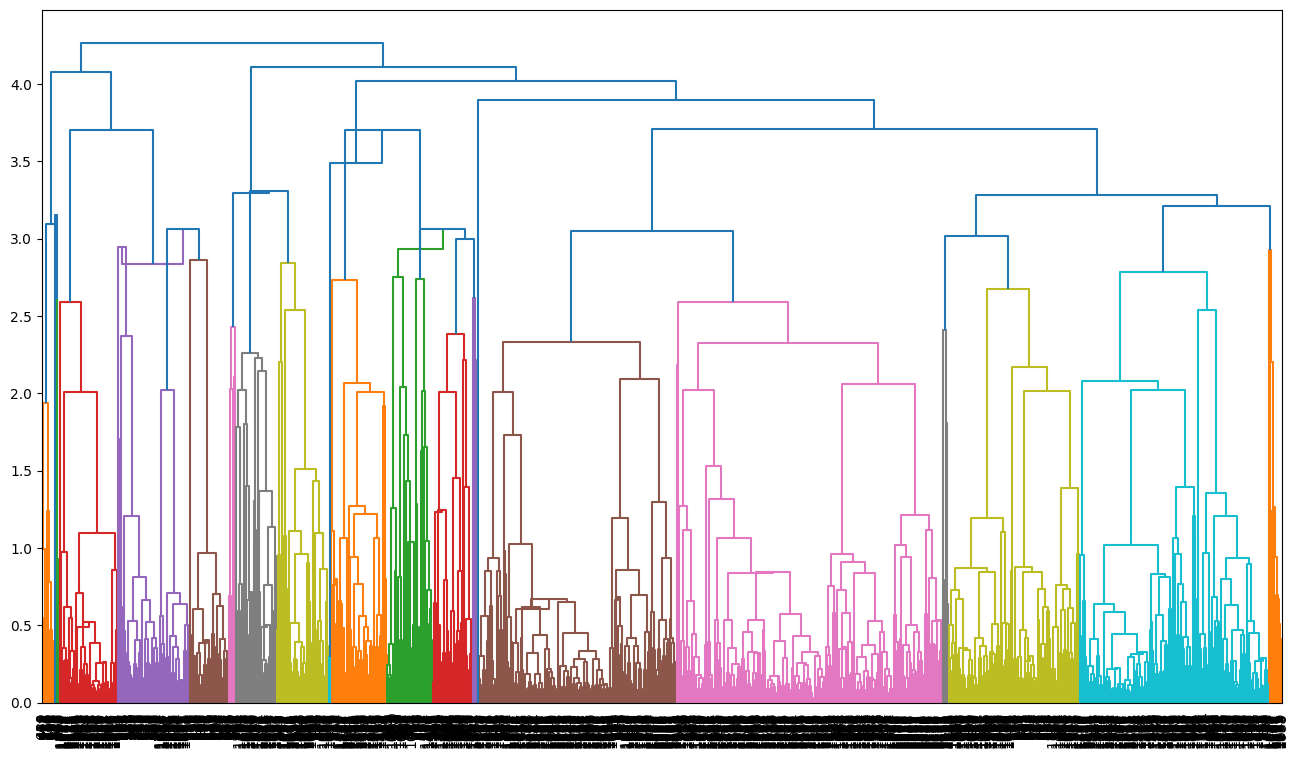

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

mergings = linkage(df_continuacion,method='centroid')
dendrogram(mergings,leaf_rotation=90,leaf_font_size=10)
plt.show()

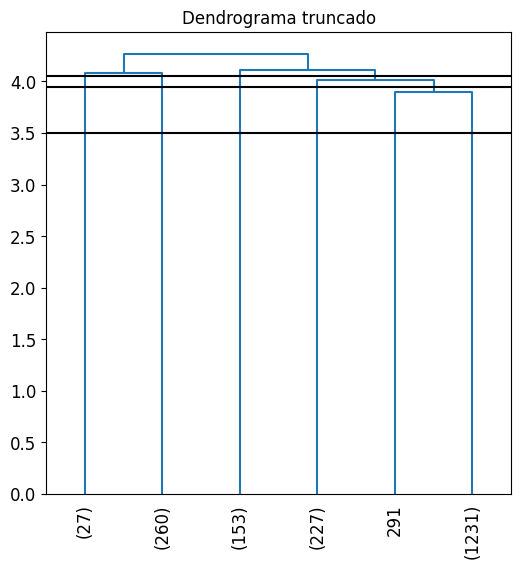

In [ ]:
fig_size = plt.rcParams["figure.figsize"]

 # Set figure width to 12 and height to 9
fig_size[0] = 6
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

# Calculate the linkage: mergings
mergings = linkage(df_continuacion,method='centroid')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,leaf_rotation=90,
            truncate_mode='lastp',
            p=6,
            leaf_font_size=12,
)
plt.axhline(y=4.05, c='k')
plt.axhline(y=3.95, c='k')
plt.axhline(y=3.5, c='k')

plt.title('Dendrograma truncado')
plt.yticks(size=12)
plt.show()


Parecen haber grupos más parejos, no uno que contenga el 95% de los datos. 


In [ ]:
max_d = 3.95
clusters = fcluster(mergings, max_d, criterion='distance')
df_continuacion['cluster_jerarquico']= clusters


<ipython-input-45-0e7c7eb2d26f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_continuacion['cluster_jerarquico']= clusters


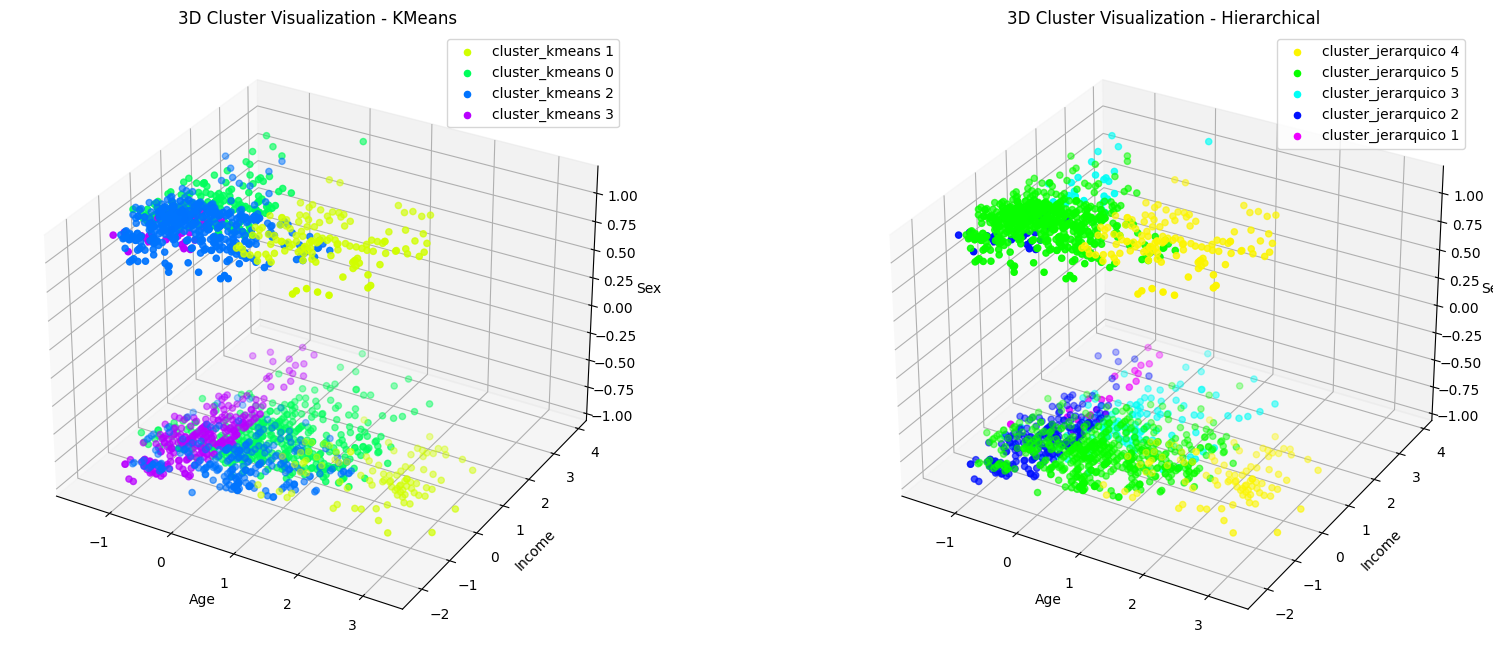

In [ ]:

# Crear una figura y dos subplots 3D
fig = plt.figure(figsize=(20, 8))

# Definir una paleta de colores utilizando seaborn para la cantidad de clusters
num_clusters_kmeans = len(df_continuacion['cluster_kmeans'].unique())
num_clusters_jerarquico = len(df_continuacion['cluster_jerarquico'].unique())

colors_kmeans = sns.color_palette("hsv", num_clusters_kmeans)
colors_jerarquico = sns.color_palette("hsv", num_clusters_jerarquico)

# Crear un diccionario para asignar colores a los clusters de kmeans
cluster_colors_kmeans = {cluster: color for cluster, color in zip(df_continuacion['cluster_kmeans'].unique(), colors_kmeans)}

# Crear un diccionario para asignar colores a los clusters jerárquicos
cluster_colors_jerarquico = {cluster: color for cluster, color in zip(df_continuacion['cluster_jerarquico'].unique(), colors_jerarquico)}

# Primer gráfico para cluster_kmeans
ax1 = fig.add_subplot(121, projection='3d')

# Graficar cada cluster_kmeans con un color distinto
for cluster in df_continuacion['cluster_kmeans'].unique():
    cluster_data = df_continuacion[df_continuacion['cluster_kmeans'] == cluster]
    ax1.scatter(cluster_data['Age'], cluster_data['Income'], cluster_data['Sex'],
                label=f'cluster_kmeans {cluster}', color=cluster_colors_kmeans[cluster])

ax1.set_xlabel('Age')
ax1.set_ylabel('Income')
ax1.set_zlabel('Sex')
ax1.set_title('3D Cluster Visualization - KMeans')
ax1.legend()

# Segundo gráfico para cluster_jerarquico
ax2 = fig.add_subplot(122, projection='3d')

# Graficar cada cluster_jerarquico con un color distinto
for cluster in df_continuacion['cluster_jerarquico'].unique():
    cluster_data = df_continuacion[df_continuacion['cluster_jerarquico'] == cluster]
    ax2.scatter(cluster_data['Age'], cluster_data['Income'], cluster_data['Sex'],
                label=f'cluster_jerarquico {cluster}', color=cluster_colors_jerarquico[cluster])

ax2.set_xlabel('Age')
ax2.set_ylabel('Income')
ax2.set_zlabel('Sex')
ax2.set_title('3D Cluster Visualization - Hierarchical')
ax2.legend()

plt.show()

Graficando 5 clústers vemos una gran similitud con el resultado de aplicar Kmeans. El primer clúster apenas tiene registros pero junto con el segundo parecen conformar el tercer clúster de Kmeans. 
El tercer clúster es parecido al clúster 0 de la izquierda.
El cuarto clúster es muy similar al primero de Kmeans que abarca a las personas mayores.
El quinto clúster es similar al segundo de Kmeans pero también toma algunos del clúster 0.

Estamos teniendo indicaciones de que se dividen de forma similar para ambos modelos. Podría indicar que es una buena segmentación.


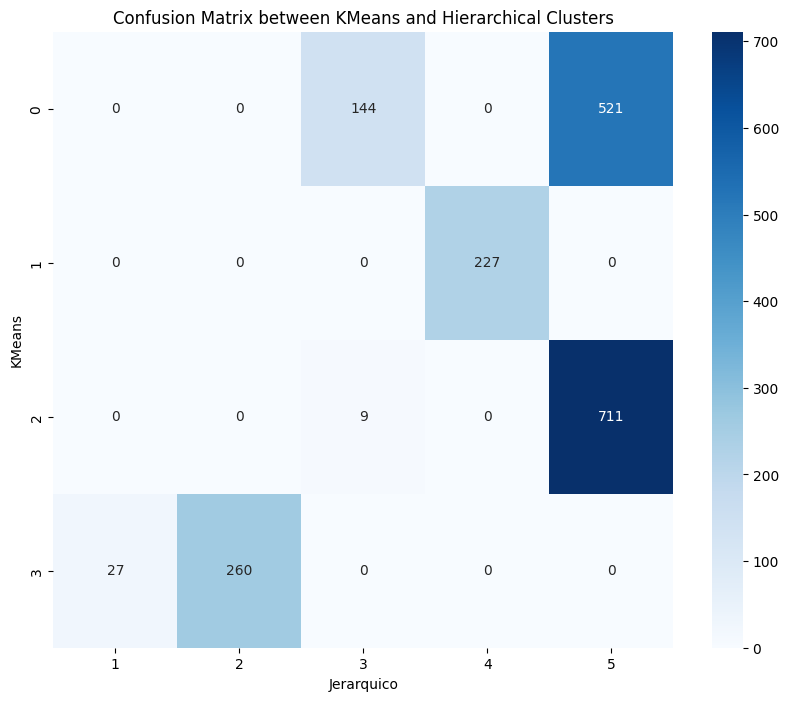

In [ ]:
# Crear la matriz de confusión utilizando pandas.crosstab
confusion_matrix = pd.crosstab(df_continuacion['cluster_kmeans'], df_continuacion['cluster_jerarquico'], rownames=['KMeans'], colnames=['Jerarquico'])

# Graficar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix between KMeans and Hierarchical Clusters')
plt.show()

Vemos evidentemente lo que estábamos diciendo sobre el quinto clúster que incluye prácticamente todos los registros del segundo clúster y se lleva también del 0.

## DBSCAN

Otro algoritmo de clústering que resuelve algunas de las limitaciones que presenta K-means es DBSCAN. 


In [ ]:
from sklearn.cluster import DBSCAN

Como no sabemos qué epsilon y min samples usar, hacemos un for que recorra varias combinaciones. 
eps_values = [3.4, 3.55, 3.70]
min_samples_values = [70, 100, 130]


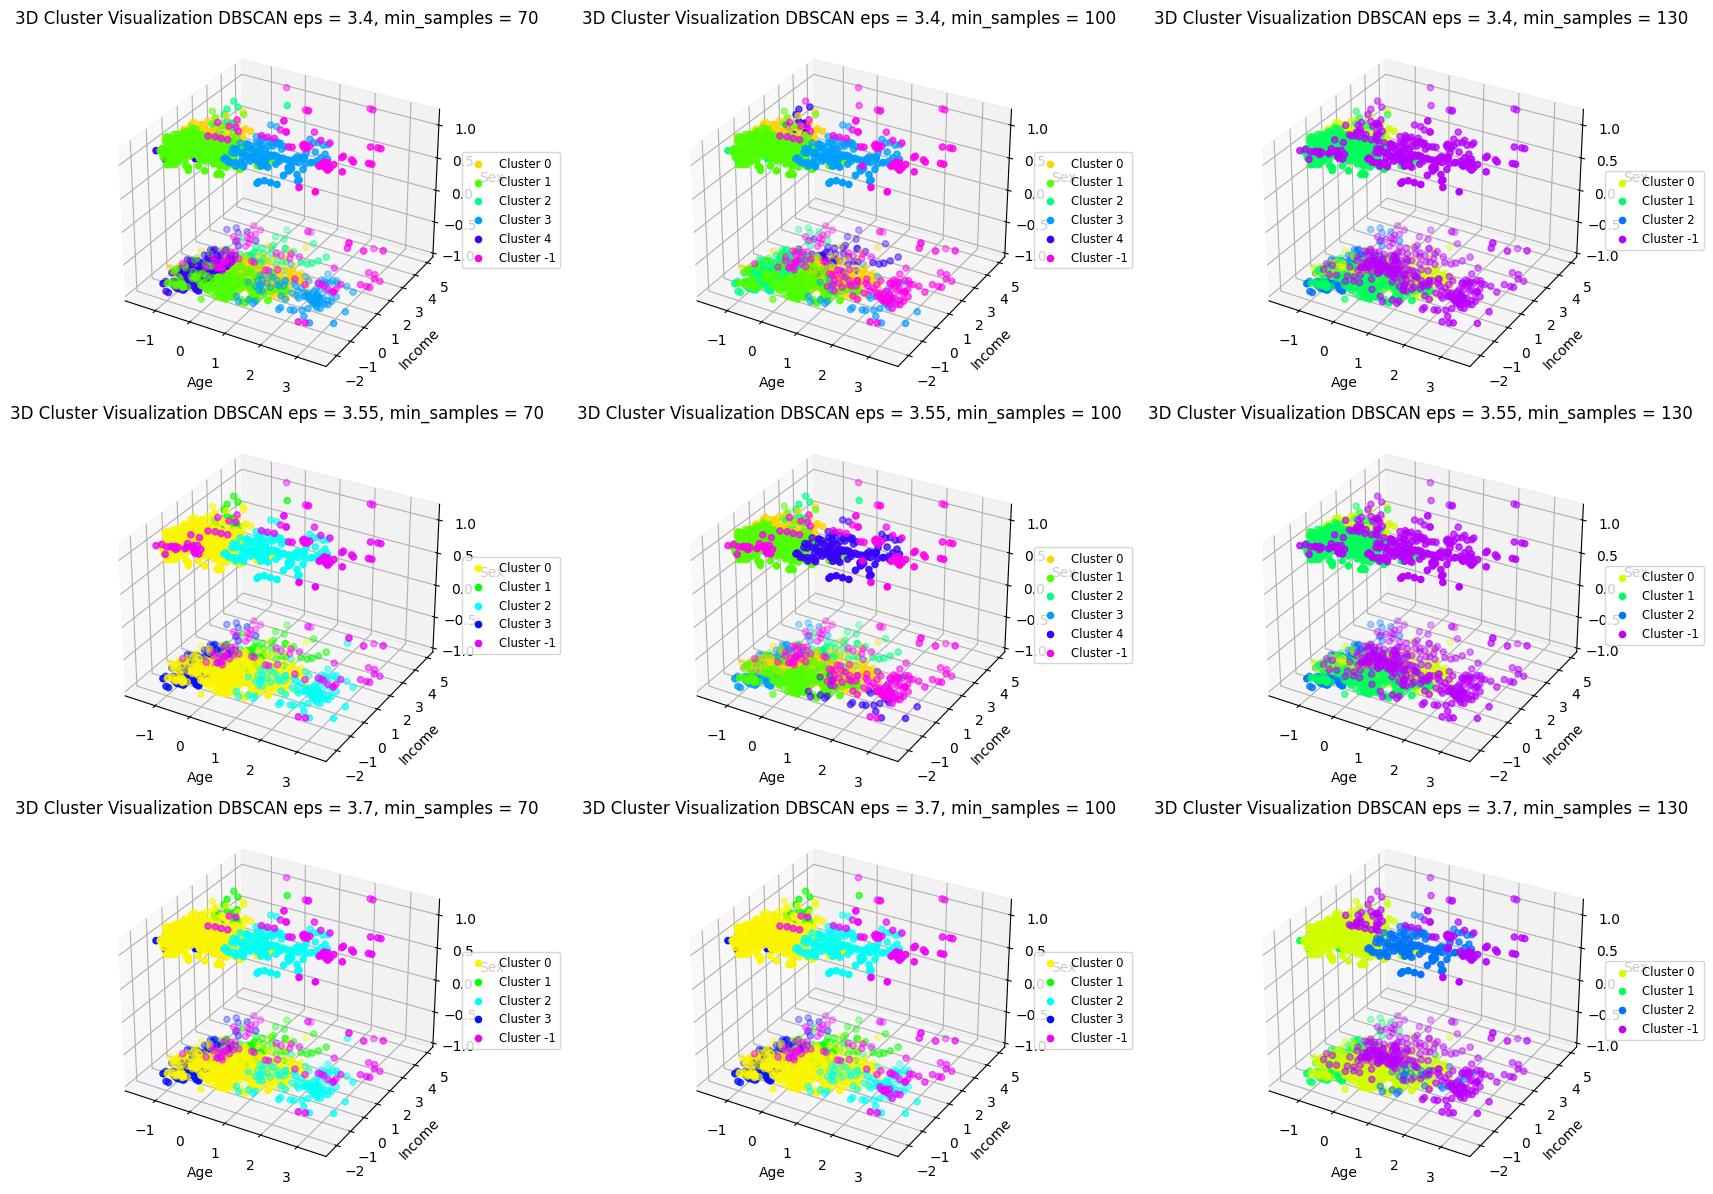

In [ ]:
eps_values = [3.4, 3.55, 3.70]
min_samples_values = [70, 100, 130]

# Tamaño de la figura
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

# Crear figura para la cuadrícula de subplots
fig = plt.figure(figsize=(18, 12))

# Recorrer valores de eps y min_samples para crear subplots
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        # Calcular posición del subplot en la cuadrícula
        position = i * len(min_samples_values) + j + 1

        # Crear subplot
        ax = fig.add_subplot(3, 3, position, projection='3d')

        db = DBSCAN(eps=eps, min_samples=min_samples).fit(df)
        cluster_labels = db.labels_

        # Agregar etiquetas de cluster al dataframe
        df['cluster_DBSCAN'] = cluster_labels

        # Colores para los clusters
        unique_clusters = set(cluster_labels)
        colors = sns.color_palette("hsv", len(unique_clusters))

        # Graficar cada cluster con un color distinto
        for cluster, color in zip(unique_clusters, colors):
            cluster_data = df[df['cluster_DBSCAN'] == cluster]
            ax.scatter(cluster_data['Age'], cluster_data['Income'], cluster_data['Sex'],
                       label=f'Cluster {cluster}', color=color)

        ax.set_xlabel('Age')
        ax.set_ylabel('Income')
        ax.set_zlabel('Sex')
        ax.set_title(f'3D Cluster Visualization DBSCAN eps = {eps}, min_samples = {min_samples}')

        # Ajustar tamaño de la leyenda
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

# Ajustar espaciado entre subplots y mostrar figura
plt.tight_layout()
plt.show()


Lo interesante de este modelo, y la nueva mirada que nos da es que el cluster que en los modelos anteriores que se formaban de adultos mayores es marcado como outliers. Esto podría ser un dato interesante para no desperdiciar tiempo ni dinero en conocer un grupo tan pequeño y disperso.

Clústeres Identificados

**Clúster 0** (Hombres jóvenes de nivel económico medio):
Características: Mayormente hombres jóvenes, nivel económico medio, secundaria completa, empleados de grandes y medianas ciudades.

Estrategias:
Ofrecer productos tecnológicos, ropa deportiva, y entretenimiento.
Promociones en productos de conveniencia y ahorro de tiempo.
Campañas de marketing en redes sociales y aplicaciones móviles.

**Clúster 1** (Adultos mayores, mayoritariamente mujeres, nivel económico medio-alto):
Características: Ambos géneros pero predominan las mujeres, edad avanzada, casados, nivel económico medio-alto, universitarios.

Estrategias:
Ofrecer productos de salud y bienestar, alimentos saludables y orgánicos.
Programas de fidelización y descuentos para jubilados.
Marketing a través de medios tradicionales como la televisión y correo directo.

**Clúster 2** (Mujeres jóvenes de clase media-baja):
Características: Adultos jóvenes mayormente mujeres, secundaria completa, desempleadas, de ciudades pequeñas.

Estrategias:
Promociones y descuentos en productos básicos y de primera necesidad.
Ofrecer programas de capacitación y empleo.
Marketing a través de redes sociales y promociones locales.

**Clúster 3** (Hombres jóvenes/adolescentes solteros de todos los niveles económicos):
Características: Hombres jóvenes/adolescentes solteros, diversos niveles económicos.

Estrategias:
Ofrecer productos de moda, tecnología y entretenimiento.
Promociones en productos de conveniencia y ahorro de tiempo.
Marketing a través de influencers y redes sociales.


**Consideración de Outliers**: El análisis con DBSCAN identificó un grupo significativo de outliers, principalmente adultos mayores, que no se agrupan claramente en ningún clúster significativo.

Estrategia para Outliers:
*   Evaluar el costo-beneficio de atender a este grupo disperso.
*   Considerar estrategias generales que puedan atraer a una audiencia amplia y diversa sin enfocarse demasiado en los outliers.
*   Podría ser más eficiente enfocar los esfuerzos de marketing y desarrollo de productos en los clústeres más grandes y definidos.
*   La segmentación de clientes ha revelado patrones claros que pueden guiar nuestras estrategias de marketing y desarrollo de productos. Al enfocar nuestros recursos en los clústeres más grandes y definidos, podemos ofrecer experiencias de compra más personalizadas, mejorar la satisfacción del cliente y, en última instancia, aumentar la rentabilidad. Los outliers, aunque importantes, podrían no justificar una inversión significativa dada su dispersión y tamaño reducido. Por lo tanto, nuestra estrategia debe centrarse en los segmentos clave identificados para maximizar el retorno de la inversión.